In [4]:
import pandas as pd
file_name="./data/StackOverFlowTags.csv"
df_sof_tags=pd.read_csv(file_name)

list_to_keep = df_sof_tags.TagName.tolist()
df_sof_tags.shape, df_sof_tags.columns

((50000, 2), Index(['TagName', 'Count'], dtype='object'))

In [5]:
import pandas as pd
file_name="./data/train_StackOverFlow_BodyTitleTags.csv"
df_sof_train=pd.read_csv(file_name)
df_sof_train['BodyTitle']=df_sof_train['Body']+df_sof_train['Title']

In [7]:
import p5_util
import p6_util
import p6_util_plot

ser_sof_train = p6_util.p6_df_standardization(df_sof_train.BodyTitle\
                                              , is_sentence_filter=False\
                                              , is_stemming=True\
                                              , is_lem=True
                                              , list_to_keep=df_sof_tags.TagName.tolist())

file_name='./data/ser_sof_train_new.dump'
p5_util.object_dump(ser_sof_train, file_name)


Cleaning text in-between markers <code></code> markers...

Cleaning LXML markers...

Remove verbs from sentences...

Removing stopwords...

Lemmatization ...

English stemming ...


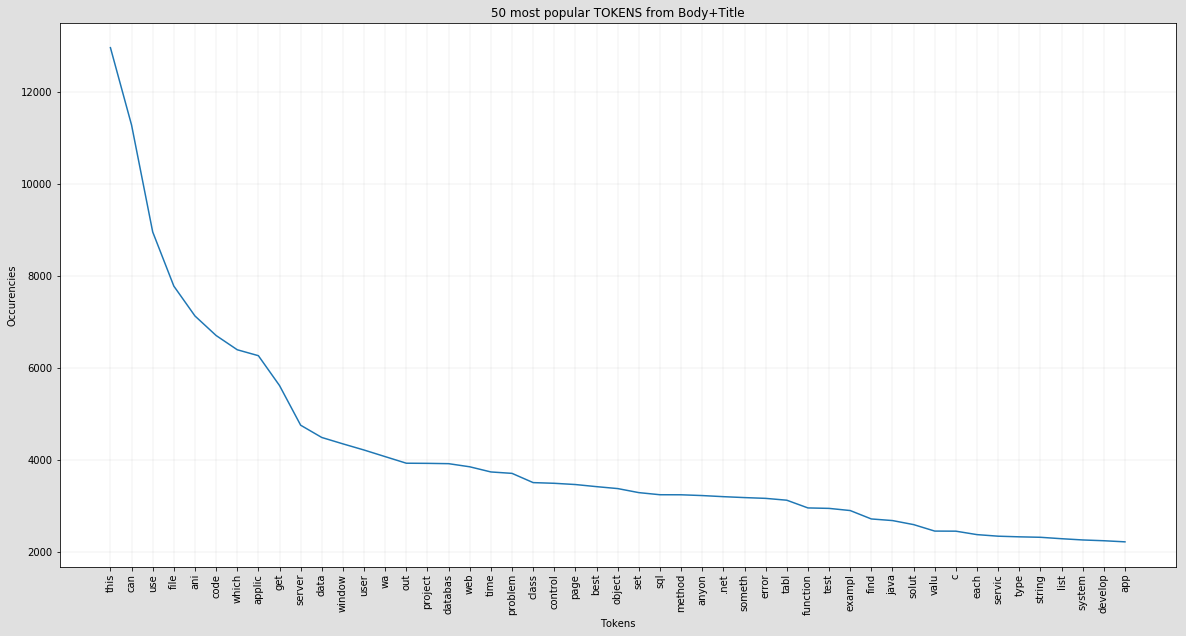

In [8]:
df_word_count = p6_util.ser_corpus_2_df_word_count(ser_sof_train, token_mode='split')




item_count=50
title = str(item_count)+" most popular TOKENS from Body+Title"
p6_util_plot.ser_item_occurency_plot(df_word_count.Word,df_word_count.Count\
                                     ,item_count, title, p_reverse=True\
                                     , p_x_title="Tokens", p_y_title="Occurencies")

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import p5_util


ngram1=1
ngram2=1
p_min_df=2.e-4
p_max_df=1.0
    
vectorizer_tfidf_1_1_c \
    = TfidfVectorizer(norm="l2", use_idf=True, min_df=p_min_df, max_df=p_max_df, ngram_range=(ngram1, ngram2))
csr_matrix_tfidf_1_1_c = vectorizer_tfidf_1_1_c.fit_transform(ser_sof_train)


file_name='./data/csr_matrix_tfidf_ngram1_1_c_'+str(p_min_df)+'_.dump'
p5_util.object_dump(csr_matrix_tfidf_1_1_c,file_name)
print(csr_matrix_tfidf_1_1_c.shape)


file_name='./data/vectorizer_tfidf_ngram1_1_c_'+str(p_min_df)+'_.dump'
p5_util.object_dump(vectorizer_tfidf_1_1_c,file_name)
print()

(24604, 5360)

